<a href="https://colab.research.google.com/github/pedro-hernandez-esquivias/Programacion/blob/main/Unidad_2_Sesi%C3%B3n_8_SVM_(Pedro).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementación de clasificador SVM (Support Vector Machine)

### Puntos importantes
* **Base Sólida**: Las SVM poseen una fundamentación teórica y matemática contundente, haciendo de ellas una herramienta confiable para la clasificación.

* **Hiperplanos Óptimos**: Estas máquinas trabajan con el concepto de hiperplanos de separación que buscan maximizar el margen entre las clases del conjunto de datos.

* **Vectores de Soporte**: Las SVM no utilizan todo el conjunto de datos, sino que se centran en puntos específicos, denominados vectores de soporte, que definen y maximizan el margen entre clases.

* **Prevención del Overfitting**: Gracias a su estructura y funcionamiento, las SVM logran una excelente generalización, minimizando el riesgo de adaptarse demasiado a los datos de entrenamiento.

* **Multiplicadores de Lagrange**: Estos multiplicadores son esenciales para resolver el problema de optimización con restricciones inherente en las SVM.

* **Funciones Kernel**: Cuando nos encontramos con datos que no son linealmente separables, las SVM utilizan funciones kernel para mapear los datos a un espacio de mayor dimensión donde pueden ser separables.

* **Flexibilidad**: Las SVM pueden trabajar tanto en problemas de clasificación como de regresión, mostrando versatilidad en distintas aplicaciones.

* **Tolerancia al Ruido**: Aunque son sensibles al ruido, las SVM tienen la capacidad de manejar cierto grado de datos atípicos o ruidosos, gracias a la elección adecuada del parámetro de regularización C.

* **Variabilidad de Kernels**: Aparte del kernel lineal, las SVM pueden implementar una variedad de funciones kernel, como polinomial, radial y sigmoidal, para adaptarse a diferentes tipos de estructuras de datos.

* **Eficiencia en Espacios de Alta Dimensión**: Las SVM pueden funcionar eficazmente en espacios con muchas dimensiones, aunque el costo computacional puede incrementar.

## SVM linealmente separable

### Importación de Librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

### Generación de datos
Estamos generando un conjunto de datos con dos clases bien separadas, ideal para demostrar el funcionamiento de una SVM lineal.

In [ ]:
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.2, random_state=45, center_box=(-5, 5))

### Creación y Entrenamiento del modelo SVM
Recordemos que C es un término que controla el equilibrio entre maximizar el margen y minimizar la clasificación errónea de los puntos de entrenamiento, donde:

**Alta C:**

* El valor de C es grande.
* El modelo tratará de clasificar todos los puntos de entrenamiento correctamente.
* La consecuencia podría ser un margen más pequeño si eso es necesario para clasificar correctamente todos los puntos.
* Puede ser más propenso al sobreajuste (overfitting) en algunos casos.

**Baja C:**

* El valor de C es pequeño.

* El modelo buscará un margen más grande, incluso si eso significa clasificar erróneamente algunos puntos de entrenamiento.
* Puede resultar en un modelo más generalizado, pero también puede subajustar (underfit) si el valor es demasiado bajo.

In [ ]:
clf = SVC(kernel='linear', C=10)
clf.fit(X, y)

SVC(C=10, kernel='linear')



* **Visualización**: Usamos Matplotlib para visualizar los datos y el modelo.
  * plt.figure(): Establece el tamaño de la figura.
  * plt.scatter(): Dibuja los puntos de datos en el gráfico.
* **Cuadrícula de valores**: Crea una cuadrícula de valores en el espacio 2D para evaluar el modelo y encontrar el hiperplano y el margen.
* **Hiperplano y margen**: Usa ax.contour() para dibujar el hiperplano (línea continua) y el margen (líneas punteadas) basándose en la evaluación del modelo en la cuadrícula de valores.
* **Punto manual**: Añade un punto manualmente al gráfico, evaluamos con el modelo SVM y lo coloreamos de acuerdo a la clase predicha.
* **Límites y visualización**: Define los límites del gráfico y muestra la figura completa.



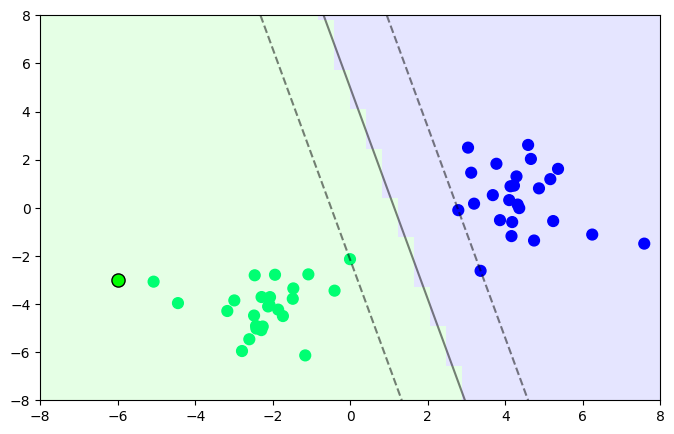

In [ ]:
# Establece el tamaño de la figura que contendrá el gráfico.
plt.figure(figsize=(8, 5))

# Establece el mapa de colores que usaremos para representar las dos clases.
cmap = clr.ListedColormap(['blue', 'lime'])

# Dibuja los puntos de datos en el gráfico.
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='winter')

# Crea una cuadrícula de valores para evaluar el modelo y determinar el hiperplano y el margen.
ax = plt.gca()
xlim = [-8, 8]
ylim = [-8, 8]

xx = np.linspace(xlim[0], xlim[1], 40)
yy = np.linspace(ylim[0], ylim[1], 40)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Obtén las predicciones para todos los puntos en la cuadrícula
Z_pred = clf.predict(xy).reshape(XX.shape)

# Dibuja las regiones de decisión
plt.pcolormesh(XX, YY, Z_pred, cmap=cmap, alpha=0.1)

# Usa decision_function para obtener el valor de decisión en lugar de la predicción
Z = clf.decision_function(xy).reshape(XX.shape)

# Dibuja el hiperplano y el margen en el gráfico.
ax.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Añade manualmente un punto y verifica a qué lado del hiperplano se encuentra.
new_data = [[-6, -3]]  # Este es un ejemplo, puedes cambiar las coordenadas como quieras.
prediction = clf.predict(new_data)
color = 'blue' if prediction[0] == 0 else 'lime'
plt.scatter(new_data[0][0], new_data[0][1], color=color, s=90, edgecolors='black', marker='o')

# Establece los límites del gráfico y muestra el gráfico.
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

## SVM linealmente no separable

### Importación de Librerías

In [ ]:
from sklearn.datasets import make_moons

### Generación de datos
Generamos ahora un conjunto diferente mediante make_moons (para generar un conjunto de datos bidimensional que simula dos lunas entrelazadas). Es un conjunto clásico para demostrar la necesidad de kernels no lineales en SVM, ya que estas "lunas" no son linealmente separables. El parámetro noise añade algo de variabilidad en los datos para hacerlos más realistas.

In [ ]:
X, y = make_moons(50, noise=0.1)

### Creación y Entrenamiento del modelo SVM
Establecemos el kernel como 'linear', lo que significa que intentará separar los datos utilizando un hiperplano lineal. La elección del parámetro de regularización C=1 es arbitraria.

In [ ]:
clf = SVC(kernel='linear', C=50).fit(X, y)



* **Visualización**: Usamos Matplotlib para visualizar los datos y el modelo.
  * plt.figure(): Establece el tamaño de la figura.
  * plt.scatter(): Dibuja los puntos de datos en el gráfico.
* **Cuadrícula de valores**: Crea una cuadrícula de valores en el espacio 2D para evaluar el modelo y encontrar el hiperplano y el margen.
* **Hiperplano y margen**: Usa ax.contour() para dibujar el hiperplano (línea continua) y el margen (líneas punteadas) basándose en la evaluación del modelo en la cuadrícula de valores.
* **Punto manual**: Añade un punto manualmente al gráfico, evaluamos con el modelo SVM y lo coloreamos de acuerdo a la clase predicha.
* **Límites y visualización**: Define los límites del gráfico y muestra la figura completa.



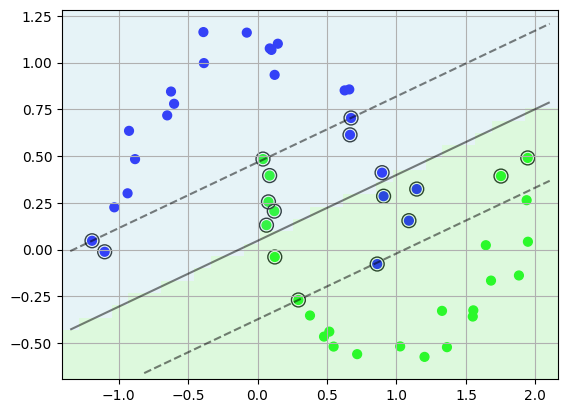

In [ ]:
# Establece el mapa de colores
cmap = clr.ListedColormap(['blue', 'lime'])

# Dibuja los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=cmap)

# Crea una cuadrícula de valores para evaluar el modelo
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Dibuja el hiperplano y el margen
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Graficamos los vectores soporte
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Representación de las áreas de decisión
Z_pred = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z_pred = Z_pred.reshape(XX.shape)
cmap_area = clr.ListedColormap(['lightblue', 'lightgreen'])
plt.pcolormesh(XX, YY, Z_pred, cmap=cmap_area, alpha=0.3)

plt.grid()
plt.show()

Aquí se puede apreciar claramente que al aplicar un kernel lineal sobre un conjunto que en principio es no separable linealmente, el clasificador acaba cometiendo muchos errores.

¿Tiene sentido modificar aquí el parámetro C?

¿Qué podemos hacer aquí para adaptar el clasificador al conjunto de datos?

## Truco Kernel (Kernel trick)

### Ejemplo en 2D

**GAMMA**: En SVM con kernel RBF, gamma es un parámetro que define la extensión de la influencia de un único punto de entrenamiento.
* Los valores altos de gamma pueden llevar a que la frontera de decisión se ajuste demasiado a los datos de entrenamiento.
* Los valores bajos pueden resultar en un ajuste muy general que puede no capturar bien las complejidades de los datos.

* Valores típicos de gamma:
  * 'scale': gamma es 1 / (n_características * varianza_de_X), que es una buena estimación inicial.
  * 'auto': gamma es 1 / n_características, que solía ser el valor predeterminado en versiones anteriores.
  * Valor numérico: Especificar un número flotante que establezca gamma de manera explícita.

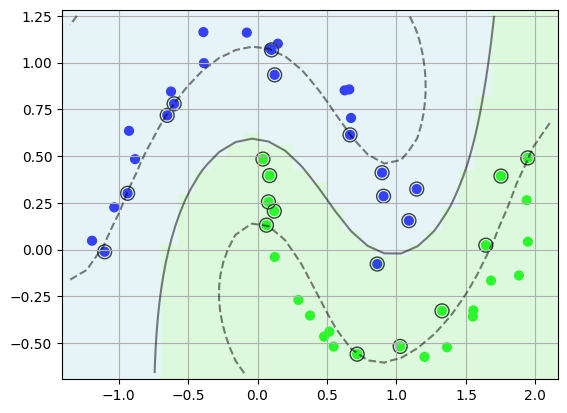

In [ ]:
# Creamos el modelo SVM con kernel RBF
clf = SVC(kernel='rbf', C=1, gamma='scale')  # gamma='scale' es el valor predeterminado y es proporcional a 1/n_características
clf.fit(X, y)

# Establece el mapa de colores
cmap = clr.ListedColormap(['blue', 'lime'])

# Dibuja los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=cmap)

# Crea una cuadrícula de valores para evaluar el modelo
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Dibuja el hiperplano y el margen
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Graficamos los vectores soporte
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Representación de las áreas de decisión
Z_pred = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z_pred = Z_pred.reshape(XX.shape)
cmap_area = clr.ListedColormap(['lightblue', 'lightgreen'])
plt.pcolormesh(XX, YY, Z_pred, cmap=cmap_area, alpha=0.3)

plt.grid()
plt.show()

* El kernel RBF parece que permite una clasificación flexible y no lineal que se adapta bien al conjunto de datos.
* La selección de gamma parece apropiada (tenemos bordes suaves)
* Margen poco consistente en ciertas partes, pero tenemos la gran mayoria de los puntos clasificados correctamente.

* ¿Qué pasaría si incrementamos o disminuimos gamma?
Probar con diferentes parámetros de gamma y estudiar el resultado

* ¿Cómo afectaría ajustar C en este escenario?
Probar con diferentes parámetros de C y estudiar el resultado

* ¿Qué pasa si usamos un kernel polinomial en vez de radial? Puedes probar con un kernel polinomial o sigmoidal y ver si se adapta a la forma de tus datos

### Ejemplo redimensionado


In [ ]:
# Importamos las librerías
from mpl_toolkits import mplot3d

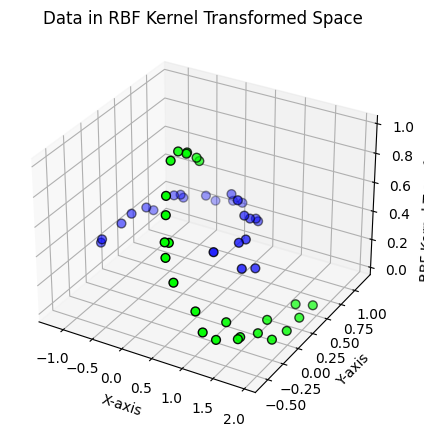

In [ ]:
# Aplicamos una operación de kernel gaussiano para obtener una nueva dimensión
gamma = 1
Xr = np.exp(-gamma * np.sum(X**2, axis=1))

# Creamos la figura 3D
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=10, azim=60) # Los ángulos de elevación y azimut se ajustan a 30 grados

# Establece el mapa de colores
cmap = clr.ListedColormap(['blue', 'lime'])

# Dibuja los puntos de datos en el espacio 3D
ax.scatter3D(X[:, 0], X[:, 1], Xr, c=y, s=40, cmap=cmap, edgecolors='k')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('RBF Kernel Transformation')

plt.title('Data in RBF Kernel Transformed Space')
plt.show()


## Caso real (Clasificador SVM letras)

### Importación de liberías

In [ ]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics

### Lectura de la información
* Se carga el archivo CSV.


In [ ]:
file_path = 'letter-recognition.csv'
df = pd.read_csv(file_path)

### Exploración básica del dataset
* Se muestran las primeras filas del conjunto de datos para tener una idea de su estructura.
* Se verifica la forma del DataFrame para conocer el número de filas y columnas.
* Se comprueba si hay valores nulos en el conjunto de datos.

Cada fila representa una letra diferente, y las columnas representan diferentes atributos geométricos y estadísticos que se pueden extraer de la imagen de la letra

* **letter**: La columna objetivo que contiene las etiquetas de las letras que el modelo intentará predecir. Cada fila corresponde a una letra del alfabeto.
* **xbox**, **ybox**: Es probable que estas columnas representen la posición de la caja delimitadora de la letra en el eje x y el eje y respectivamente.
* **width**, **height**: Estas columnas podrían representar el ancho y la altura de la caja delimitadora de la letra.
* **onpix**: Esta columna podría representar el número de píxeles encendidos o la cantidad de tinta utilizada para la letra.
* **xbar**, **ybar**: Estas columnas podrían ser el promedio de la posición x y y de todos los píxeles encendidos.
* **x2bar**, **y2bar**: Podrían representar la varianza o un segundo momento del eje x y y de los píxeles encendidos.
* **xybar**: Puede representar la correlación entre las posiciones x e y de los píxeles encendidos.
* *x2ybar**, xy2bar: Estas podrían ser otras características relacionadas con los momentos o correlaciones entre los píxeles encendidos.
* **xedge**, **yedge**: Podrían indicar la orientación del borde de la letra en la dirección x o y.
* **xedgey**, **yedgex**: Podrían ser características que capturan la correlación entre los bordes y la orientación en la imagen de la letra.

In [ ]:
print('Primeras filas del conjunto de datos:')
print(df.head())
print('\nForma del DataFrame:', df.shape)
print('\nValores nulos por columna:')
print(df.isna().sum())

Primeras filas del conjunto de datos:
  letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0      T      2      8       3       5       1      8     13      0       6   
1      I      5     12       3       7       2     10      5      5       4   
2      D      4     11       6       8       6     10      6      2       6   
3      N      7     11       6       6       3      5      9      4       6   
4      G      2      1       3       1       1      8      6      6       6   

   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0       6      10       8       0       8       0       8  
1      13       3       9       2       8       4      10  
2      10       3       7       3       7       3       9  
3       4       4      10       6      10       2       8  
4       6       5       9       1       7       5      10  

Forma del DataFrame: (20000, 17)

Valores nulos por columna:
letter    0
xbox      0
ybox      0
width     0
height    0
onpix

**Ejercicio extra 1:**  Antes de entrenar el modelo, puede ser útil mostrar visualizaciones de los datos para estudiar mejor la distribución de las clases y las características. Realiza dicho estudio.

**Ejercicio extra 2:** Incluye una sección que realice un análisis exploratorio más profundo para inspeccionar las características, como histogramas o box plots.

### Separación del dataset en entrenamiento y test
* Se separan las características (X) de la etiqueta objetivo (y).
* Se dividen los datos en conjuntos de entrenamiento y prueba. Estás usando una división basada en índices, por lo que he mantenido esa estructura.

In [ ]:
# 2. Preparar los datos
X = df.drop('letter', axis=1)
y = df['letter']

# Utilizamos train_test_split para dividir los datos de manera aleatoria
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenamiento del modelo SVM
* Se crea un modelo SVM con un parámetro C de 3.
* Se entrena el modelo usando el conjunto de entrenamiento.

In [ ]:
# 3. Entrenar el modelo SVM
# No especificamos ni kernel ni gamma ¿Cómo está funcionando aquí?
model = SVC(C=1)
model.fit(X_train, y_train)

SVC(C=1)

### Evaluación del modelo
* Se realiza una predicción usando el conjunto de prueba.
* Se calcula y muestra la precisión del modelo.
* Se genera una matriz de confusión para visualizar el rendimiento del modelo en cada clase.
* Se utiliza Seaborn para visualizar la matriz de confusión. La matriz muestra las predicciones del modelo en comparación con las etiquetas reales.

In [ ]:
# 4. Evaluar el modelo
y_pred = model.predict(X_test)

# Precisión
accuracy = model.score(X_test, y_test)
print('\nPrecisión del modelo:', accuracy)

# F1-Score
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
print('\nF1-Score:', f1)

# Recall y Precision
recall = metrics.recall_score(y_test, y_pred, average='weighted')
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print('\nRecall:', recall)
print('\nPrecision:', precision)

# Reporte de clasificación
report = metrics.classification_report(y_test, y_pred, labels=lab)
print('\nReporte de Clasificación:')
print(report)


Precisión del modelo: 0.9305

F1-Score: 0.9307689684025758

Recall: 0.9305

Precision: 0.9345960157935597

Reporte de Clasificación:
              precision    recall  f1-score   support

           A       0.97      0.97      0.97       149
           B       0.83      0.93      0.88       153
           C       0.97      0.90      0.93       137
           D       0.82      0.98      0.89       156
           E       0.91      0.92      0.92       141
           F       0.88      0.96      0.91       140
           G       0.88      0.93      0.91       160
           H       0.96      0.74      0.83       144
           I       0.97      0.92      0.94       146
           J       0.95      0.93      0.94       149
           K       0.88      0.86      0.87       130
           L       0.99      0.92      0.95       155
           M       0.96      0.98      0.97       168
           N       0.98      0.92      0.95       151
           O       0.90      0.92      0.91       145
 

1. **Reporte de Clasificación**: Proporciona las siguientes métricas para cada clase y las medias ponderadas:

  * **Precisión**: De todas las predicciones de una clase, ¿cuántas eran correctas?
  * **Recall** (Sensibilidad): De todas las instancias reales de una clase, ¿cuántas fueron correctamente predichas por el modelo?
  * **F1-Score**: Es una media armónica entre precisión y recall. Es útil si quieres tener una métrica única que combine ambas.

In [ ]:
# Matriz de confusión
lab = list(string.ascii_uppercase[0:26])
plab = ['Predicted ' + s for s in lab]
cm = metrics.confusion_matrix(y_test, y_pred, labels=lab)
df_cm = pd.DataFrame(cm, index=lab, columns=plab)

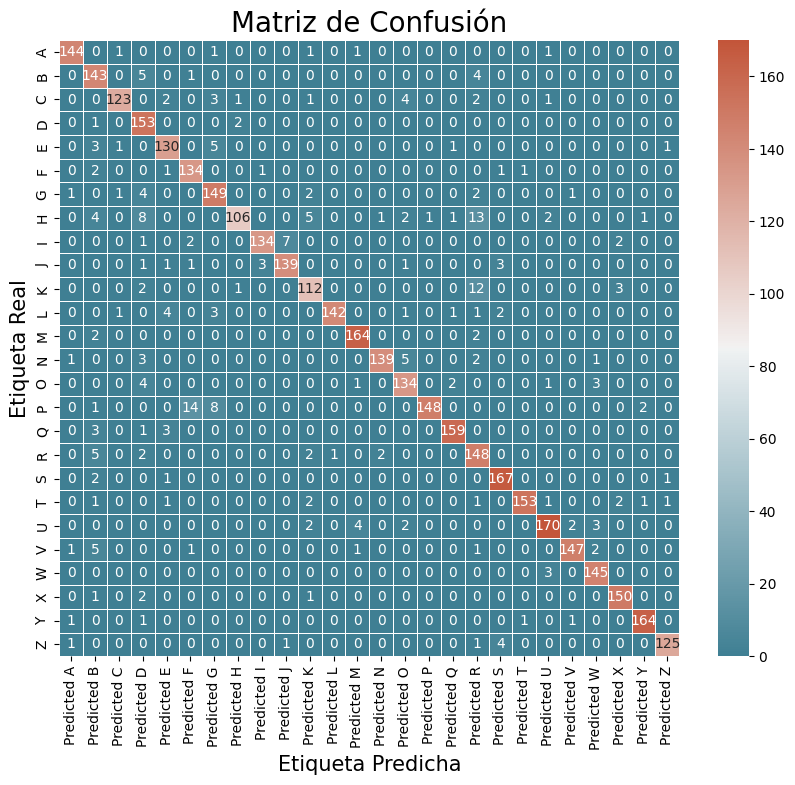

In [ ]:
# Visualizar la matriz de confusión de manera mejorada
plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True, fmt='g', cmap=sns.diverging_palette(220, 20, as_cmap=True), linewidths=.5)

plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Real', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
plt.show()

### Validación cruzada

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Crear un pipeline que primero estandariza los datos y luego aplica SVM
# El pipeline nos sirve por comodidad y simplicidad para agrupar las diferentes etapas de procesamiento
# Evitar fuga de datos, poder reproducir todo el flujo, etc.
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Esto asegura que estandarizamos los datos
    ('svm', SVC())                 # SVM para la clasificación
])

# Definimos los parámetros para la búsqueda en malla
parameters = {
    'svm__C': [0.1, 1, 10, 100],  # Ejemplos de valores de C
    'svm__gamma': [0.001, 0.01, 0.1, 1, 'scale'],  # Ejemplos de valores de gamma
    'svm__kernel': ['rbf']  # Puedes probar otros kernels como 'linear', 'poly', 'sigmoid'
}

# Configuramos GridSearchCV
"""
Esto nos sirve para automatizar el procesode ajuste de los hiperparametros probando
todas las combinaciones posibles, seleccionando el mejor modelo
  - n_jobs=-1: Este parámetro le indica a GridSearchCV que utilice todos los procesadores disponibles para realizar la búsqueda en malla
  - cv=5: Esto define el número de pliegues que se utilizarán en la validación cruzada. En este caso, cv=5 significa que GridSearchCV dividirá el conjunto de datos en 5 partes
  - verbose=2: Este parámetro controla la cantidad de mensajes que GridSearchCV imprimirá del proceso.
"""
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, cv=5, verbose=2)

# Realizamos la búsqueda con validación cruzada
grid_search.fit(X_train, y_train)

# Imprimimos los mejores parámetros y el mejor score encontrados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score de validación cruzada:", grid_search.best_score_)

# Evaluamos el mejor modelo encontrado en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculamos métricas de rendimiento
accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
precision = metrics.precision_score(y_test, y_pred, average='weighted')

print('\nPrecisión del modelo:', accuracy)
print('F1-Score:', f1)
print('Recall:', recall)
print('Precision:', precision)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros: {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Mejor score de validación cruzada: 0.9699375

Precisión del modelo: 0.97875
F1-Score: 0.97875056013588
Recall: 0.97875
Precision: 0.9790116004784015
